In [22]:
%pip install openai

Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
openai_token = input('Please enter your OpenAI token: ')
os.environ['OPENAI_API_KEY'] = openai_token

In [25]:
from llama_index.embeddings.openai import OpenAIEmbedding


In [26]:
embed_model = OpenAIEmbedding(model='text-embedding-ada-002')

In [27]:
embedding = embed_model.get_text_embedding("Embeddings represent text as numerical vectors in AI systems.")


In [28]:
len(embedding)

1536

In [29]:
embedding

[-0.026965569704771042,
 -0.00368303875438869,
 0.009897353127598763,
 -0.009214104153215885,
 0.009201089851558208,
 0.0003587058454286307,
 -0.003188496455550194,
 -0.010730266571044922,
 -0.01457598339766264,
 -0.017972707748413086,
 0.009741181507706642,
 0.03271787613630295,
 -0.0165671668946743,
 -0.002261229557916522,
 -0.01978169195353985,
 0.018597392365336418,
 0.012337529100477695,
 0.018935764208436012,
 0.016957594081759453,
 -0.02135641872882843,
 -0.020939961075782776,
 0.0036700244527310133,
 -0.020028963685035706,
 -0.007216413039714098,
 -0.017426108941435814,
 -0.0011379353236407042,
 0.017191851511597633,
 -0.033238448202610016,
 -0.004652601666748524,
 -0.013873212970793247,
 0.012747478671371937,
 -0.025143571197986603,
 -0.014107469469308853,
 -0.002212426159530878,
 -0.025130556896328926,
 0.022410575300455093,
 0.012083750218153,
 -0.03912089765071869,
 0.014328712597489357,
 -0.006129721645265818,
 0.0030941430013626814,
 0.02368597313761711,
 0.00185127998702

In [30]:
# Define the statements
statements = [
    "The cat is on the mat.",                     # Set 1 - Stmt 1
    "The sun rises in the east.",                 # Unrelated - Stmt 2
    "The feline rests on the carpet.",            # Set 1 - Stmt 3
    "Artificial Intelligence is fascinating.",    # Set 2 - Stmt 4
    "Machine learning drives AI advancements.",   # Set 2 - Stmt 5
    "Birds fly in the sky.",                      # Unrelated - Stmt 6
    "Deep learning is a subset of AI.",           # Set 2 - Stmt 7
    "Cat and Cow are domestic animals",           # Set 1  - Stmt 8
    "Equity, mutual funds and stocks are various options to invest", # Set 3 - Stmt 9
    "Gold can be used as hedge towards the investement", # Set 3 - Stmt 10
    "Nifty and Sensex are major index in India", # Set 3 - Stmt 11
    "Nasdaq, Dow and S&P 100 are major index in India", # Set 3 - Stmt 12
]

In [31]:
batch_embeddings = [embed_model.get_text_embedding(statement) for statement in statements]

In [32]:
# Display information about the embeddings
for i, emb in enumerate(batch_embeddings):
    print(f"Embedding {i + 1}: Length = {len(emb)}, First 5 dimensions = {emb[:5]}")

Embedding 1: Length = 1536, First 5 dimensions = [-0.004362554755061865, -0.009984337724745274, -0.016708744689822197, -0.010297546163201332, -0.012362169101834297]
Embedding 2: Length = 1536, First 5 dimensions = [0.030643098056316376, -0.021733487024903297, -0.013581876643002033, -0.009176775813102722, -0.013383056037127972]
Embedding 3: Length = 1536, First 5 dimensions = [0.009508931078016758, 0.00019441571203060448, -0.0060586752369999886, -0.018456637859344482, 0.004228317644447088]
Embedding 4: Length = 1536, First 5 dimensions = [-0.008111191913485527, 0.00012451213842723519, 0.012467802502214909, -0.01503127533942461, 0.010143845342099667]
Embedding 5: Length = 1536, First 5 dimensions = [-0.020344818010926247, -0.013106000609695911, 0.018690980970859528, -0.00575233343988657, 0.006897549610584974]
Embedding 6: Length = 1536, First 5 dimensions = [0.0012297016801312566, -0.02620074152946472, -0.008511540479958057, -0.007351997308433056, 0.0023684287443757057]
Embedding 7: Leng

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [34]:

# Analyze relationships in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(batch_embeddings)


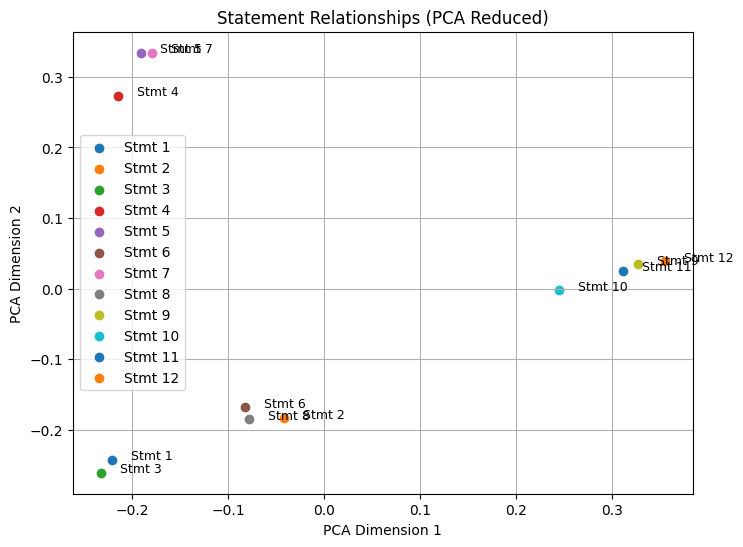

In [35]:

# Scatter plot to visualize relationships
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced_embeddings):
    plt.scatter(x, y, label=f"Stmt {i+1}")
    plt.text(x + 0.02, y, f"Stmt {i+1}", fontsize=9)

plt.title("Statement Relationships (PCA Reduced)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid()
plt.show()